# Data Mining with KMeans
disini saya akan mencoba untuk mengekstrak informasi dari sekumpulan data perusahaan yang sudah dikumpulkan pada laman glassdoor sebelumnya

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cleanData.csv")

In [3]:
df.head(5)

,Unnamed: 0,companyId,companyName,companyRating,companyEmployees,companyLocation,companyDescription,companyType
0,0,company_0,IBM,4.0,10000+ employees,Jakarta,"IBM works to design, advance, and scale the te...",Information Technology
1,1,company_1,Tokopedia,4.2,5001 to 10000 employees,Jakarta,Tokopedia is an Indonesian technology company ...,Information Technology
2,2,company_2,Google,4.3,10000+ employees,Jakarta,"Since our founding in 1998, Google has grown b...",Information Technology
3,3,company_3,Microsoft,4.2,10000+ employees,Jakarta,"At Microsoft, our mission is to empower every ...",Information Technology
4,4,company_4,Gojek,4.1,1001 to 5000 employees,Jakarta,Gojek is Southeast Asia’s leading on-demand pl...,Information Technology


# Data Cleaning
proses menyiapkan data agar bisa dimasukkan ke algoritma machine learning disebut sebagai Data Cleaning

proses yang akan saya lakukan adalah melakukan labeling terhadap fitur yang bernilai string (text), dan melakukan normalisasi pada data yang sudah dilabeli

# selective labeling
pada kolom fitur (atau dimension pada tableau) companyEmployees, kita akan mengurutkan banyaknya karyawan menjadi kelas dengan bentuk data kategorikal

untuk bagian ini saya memilih melakukan selective labeling karena dalam proses saya melakukan scraping sebelumnya, terdapat kecenderungan perusahaan yang tidak mengisi lengkap informasi perusahaan mereka dilaman glassdoor, ini bisa menjadi bahwa perusahaan tersebut tidak lagi mengupdate informasi perusahaan mereka di akun tersebut

selective labeling ini dilakukan untuk memberikan gambaran yang jelas pada algoritma untuk melihat salah satu tingkatan sebuah perusahaan ada di jumlah karyawan mereka

In [4]:
company_employees_keys = [
    'Unknown',
    '1 to 50 employees',
    '51 to 200 employees',
    '201 to 500 employees',
    '501 to 1000 employees',
    '1001 to 5000 employees',
    '5001 to 10000 employees',
    '10000+ employees'
     ]
company_employees_dict = {company_employees_keys[i] : i for i in range(len(company_employees_keys))}

In [5]:
company_employees_dict

{'Unknown': 0,
 '1 to 50 employees': 1,
 '51 to 200 employees': 2,
 '201 to 500 employees': 3,
 '501 to 1000 employees': 4,
 '1001 to 5000 employees': 5,
 '5001 to 10000 employees': 6,
 '10000+ employees': 7}

# random labeling
pada fitur companyType, saya akan melakukan random labeling sesuai pada urutan list unique dari fitur companyType

hal ini saya lakukan karena pada dasarnya, setiap tipe industry yang digeluti masing-masing perusahaan memiliki beban yang seimbang, sehingga
random labeling pun dapat dilakukan

In [6]:
company_type_keys = list(df["companyType"].unique())
company_type_dict = {company_type_keys[i] : i for i in range(len(company_type_keys))}

In [7]:
company_type_dict

{'Information Technology': 0,
 'Banking & Lending': 1,
 'Accounting & Tax': 2,
 'Advertising & Public Relasion': 3,
 'Shipping & Trucking': 4}

# labeling biasa
pada fitur companyDescription, ada beberapa perusahaan yang tidak memberikan deskripsi yang jelas pada perusahaan mereka, ini juga dapat menjadi salah satu indikator apakah perusahaan itu masih menggunakan aplikasi glassdoor sebagai laman pencarian karyawan mereka

karena itu hanya akan ada 2 kelas yang ada di fitur ini, yaitu 1 sebagai indikator perusahaan yang memberikan deskripsi perusahaan, dan 0 untuk yang tidak

In [8]:
def companyDescriptionState(x):
    if(x == True):
        return 1
    else:
        return 0

# masukan semua hasil ke DataFrame
ada dua cara yang bisa dilakukan untuk memasukkan hasil dari data cleaning ke Data Frame, yaitu pertama langsung memasukkan Series dari data yang sudah dibersihkan ke Data Frame, yang kedua menggunakan parameter inplace=

untuk contoh dibawah saya hanya menggunakan cara pertama karena method map dari dataframe tidak memiliki parameter inplace=

In [9]:
df["companyDescription"] = pd.Series(
    [companyDescriptionState(x) for x in ~df.companyDescription.isna()],
    dtype="int32"
)

In [10]:
#masukkan dictionary ke method map agar data yang sesuai dengan key dict akan diubah menjadi nilai valuenya
df["companyEmployees"] = df["companyEmployees"].map(company_employees_dict)

In [11]:
df["companyType"] = df["companyType"].map(company_type_dict)

# Hasil Data Cleaning
hasil dari proses data cleaning diatas adalah sebagai berikut :

In [12]:
df.head(5)

,Unnamed: 0,companyId,companyName,companyRating,companyEmployees,companyLocation,companyDescription,companyType
0,0,company_0,IBM,4.0,7,Jakarta,1,0
1,1,company_1,Tokopedia,4.2,6,Jakarta,1,0
2,2,company_2,Google,4.3,7,Jakarta,1,0
3,3,company_3,Microsoft,4.2,7,Jakarta,1,0
4,4,company_4,Gojek,4.1,5,Jakarta,1,0


# Normalisasi Data
untuk proses normalisasi, kita akan menggunakan class yang telah tersedia pada modul skelarn, tujuan dari melakukan normalisasi ini adalah agar data yang akan dimasukkan ke algoritma KMeans memiliki range yang setara

sebelum itu, kita pisahkan terlebih dahulu data yang ingin kita normalisasi

In [13]:
from sklearn.preprocessing import MinMaxScaler

untuk kenapa saya tidak menggunakan nama perusahaan dan lokasinya, ada beberapa alasan :
 - nama perusahaan hanya akan menjadi pengenal pada suatu perusahaan, tidak ada signifikansinya terhadap model ML
 - untuk lokasi, karena semua data ini masih berpusah di jakarta, mungkin kedepannya akan saya tambahkan data dari daerah lain

In [14]:
x = ["companyRating", "companyEmployees", "companyType", "companyDescription"]
x = df[x]

In [15]:
x

,companyRating,companyEmployees,companyType,companyDescription
0,4.0,7,0,1
1,4.2,6,0,1
2,4.3,7,0,1
3,4.2,7,0,1
4,4.1,5,0,1
...,...,...,...,...
548,4.0,3,4,1
549,4.0,5,4,0
550,4.0,0,4,0
551,4.0,1,4,0


In [16]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x)

Hasil normalisasi :

In [17]:
x_train

array([[0.        , 1.        , 0.        , 1.        ],
       [0.2       , 0.85714286, 0.        , 1.        ],
       [0.3       , 1.        , 0.        , 1.        ],
       ...,
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.14285714, 1.        , 0.        ],
       [1.        , 0.14285714, 1.        , 0.        ]], shape=(553, 4))

# clustering menggunakan KMeans
setelah proses data cleaning dan optionalnya normalisasi, kita baru dapat memasukkan data-data ini ke algoritma KMeans

tapi sebelum itu, kita harus memeriksa pada cluster berapa klasifikasinya paling optimalnya, disini kita dapat menggunakan salah satu metode pengecekan kualitas clustering bernama elbow method (bagaimananya silahkan dicari di internet)

In [18]:
from sklearn.cluster import KMeans

Setelah melihat hasil dibawah, bagian yang membentuk "siku", ada di cluster 6, maka kita akan gunakan itu untuk proses klasifikasi selanjutnya

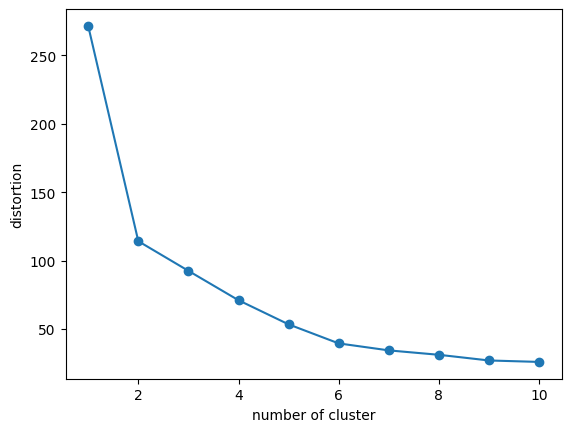

In [19]:
distortion = []

for i in range(1,11):
    km = KMeans(
        n_clusters=i, init="random",
        n_init="auto", max_iter=500,
        tol=1e-04, random_state=0
    )
    km.fit(x_train)
    distortion.append(km.inertia_)
    
plt.plot(range(1,11), distortion, marker="o")
plt.xlabel("number of cluster")
plt.ylabel("distortion")
plt.show()

In [20]:
kmeans_classifier = KMeans(
    n_clusters=6, init="random",
    n_init="auto", max_iter=300,
    tol=1e-04, random_state=0
)
kmeans_classifier.fit(x_train)

KMeans(init='random', n_clusters=6, random_state=0)

hasil prediksi kelas dimasukkan ke fitur baru bernama predictedClasses

In [21]:
df["predictedClasses"] = pd.Series(kmeans_classifier.predict(x_train))

# Hasil
disini, setelah kita dapat 6 kelas diatas, kita dapat membuat asumsi bahwa ke 6 kelas ini mengurutkan kelompok perusahaan dari data-data yang menentukan kepopuleran, update tidaknya data mereka, serta rating dari glassdoor sendiri

bisa kita lihat, setelah dilakukan proses sorting dibawah berdasarkan hasil prediksi KMeans, kita bisa lihat bahwa perusahaan populer seperti IBM ada di urutan atas, dan ini masuk akal karena IBM merupakan salah satu perusahaan ternama di jakarta

dan kita juga bisa lihat penilaian predicted classes tidak bias ke salah satu fitur, karena kita bisa lihat dibawah, walau IBM memiliki rating 4.0 yang bisa dibilang lebih rendah daripada data paling bawah, tetapi tetap menempati posisi pertama karena banyaknya karyawan mereka 

In [24]:
df.sort_values(by=["predictedClasses"])

,Unnamed: 0,companyId,companyName,companyRating,companyEmployees,companyLocation,companyDescription,companyType,predictedClasses
0,0,company_0,IBM,4.0,7,Jakarta,1,0,0
1,1,company_1,Tokopedia,4.2,6,Jakarta,1,0,0
2,2,company_2,Google,4.3,7,Jakarta,1,0,0
3,3,company_3,Microsoft,4.2,7,Jakarta,1,0,0
4,4,company_4,Gojek,4.1,5,Jakarta,1,0,0
...,...,...,...,...,...,...,...,...,...
521,521,company_525,LMD,4.4,0,Jakarta,0,3,5
524,524,company_528,TyrAds,4.5,1,Jakarta,0,3,5
523,523,company_527,SSDS,4.1,2,Jakarta,0,3,5
522,522,company_526,Enthusem Digital Marketing,4.8,1,Jakarta,0,3,5


# kekurangan
untuk sekarang, data diatas masih mencakup 5 tipe perusahaan saja, dan sebagian besar datanya masih didominasi oleh perusahaan IT, ini menjadikan dataset tidaklah sempurna, dan juga masih banyak data yang belum saya ambil jadi masih banyak data yang bisa diproses (kecuali kalian ingin membuat penelitian tentang perusahaan terbanyak di jakarta, ketidakseimbangan ini malah menjadi kunci utama)

untuk pengembangan kedepan, bisa dilakukan penambahan data dengan berbagai tipe perusahaan, bahkan lokasi perusahaan jika ingin memperluas ranah penelitian kalian